In [3]:
import xarray as xr
import pandas as pd

# Read Watershed Data

In [4]:
ds = xr.open_dataset('./data/HYSETS_2020_QC_stations.nc')
print(ds)

<xarray.Dataset>
Dimensions:                     (time: 25202, watershed: 14425)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
Dimensions without coordinates: watershed
Data variables: (12/13)
    watershedID                 (watershed) float64 ...
    drainage_area               (watershed) float64 ...
    drainage_area_GSIM          (watershed) float64 ...
    flag_GSIM_boundaries        (watershed) float64 ...
    flag_artificial_boundaries  (watershed) float64 ...
    centroid_lat                (watershed) float64 ...
    ...                          ...
    elevation                   (watershed) float64 ...
    slope                       (watershed) float64 ...
    discharge                   (watershed, time) float32 ...
    pr                          (watershed, time) float32 ...
    tasmax                      (watershed, time) float32 ...
    tasmin                      (watershed, time) float32 ...
Attributes: (12/13)
    tit

<xarray.Dataset>
Dimensions:                     (time: 25202)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
Data variables: (12/13)
    watershedID                 float64 ...
    drainage_area               float64 ...
    drainage_area_GSIM          float64 ...
    flag_GSIM_boundaries        float64 ...
    flag_artificial_boundaries  float64 ...
    centroid_lat                float64 ...
    ...                          ...
    elevation                   float64 ...
    slope                       float64 ...
    discharge                   (time) float32 ...
    pr                          (time) float32 ...
    tasmax                      (time) float32 ...
    tasmin                      (time) float32 ...
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Cl

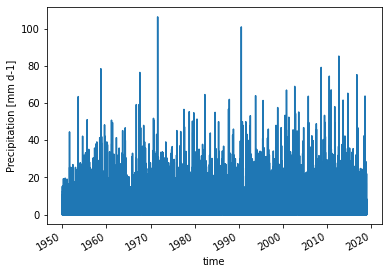

In [5]:
ws = ds.sel(watershed=100)
print(ws)
ws.pr.plot()

In [6]:
ds.indexes

time: DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
                     '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
                     '1950-01-09', '1950-01-10',
                     ...
                     '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
                     '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
                     '2018-12-30', '2018-12-31'],
                    dtype='datetime64[ns]', name='time', length=25202, freq=None)

In [7]:
for key in ds.keys():
    print(key)
print(ds["centroid_lat"])
print(ds["centroid_lon"])

watershedID
drainage_area
drainage_area_GSIM
flag_GSIM_boundaries
flag_artificial_boundaries
centroid_lat
centroid_lon
elevation
slope
discharge
pr
tasmax
tasmin
<xarray.DataArray 'centroid_lat' (watershed: 14425)>
array([47.25806 , 47.20661 , 47.5385  , ..., 26.883333, 21.854167, 20.958333])
Dimensions without coordinates: watershed
Attributes:
    description:    Latitude (degrees North) coordinates of the centroid of t...
    long_name:      centroid_latitude
    standard_name:  centroid_latitude
    units:          degrees_North (South is negative)
<xarray.DataArray 'centroid_lon' (watershed: 14425)>
array([ -68.59583 ,  -68.95694 ,  -68.5918  , ..., -108.366667, -104.715278,
       -100.916667])
Dimensions without coordinates: watershed
Attributes:
    description:    Longitude (degrees Eest) coordinates of the centroid of t...
    long_name:      centroid_longitude
    standard_name:  centroid_longitude
    units:          degrees_East (West is negative)


In [8]:
ds = ds.set_coords(("centroid_lat", "centroid_lon"))
ds = ds.where((ds["centroid_lat"] >= 49) & (ds["centroid_lat"] <= 54) & (ds["centroid_lon"] >= -114) & (ds["centroid_lon"] <= -97), drop = True)
ds

<xarray.Dataset>
Dimensions:                     (watershed: 290, time: 25202)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
    centroid_lat                (watershed) float64 49.49 49.98 ... 49.31 49.26
    centroid_lon                (watershed) float64 -113.9 -113.7 ... -107.7
Dimensions without coordinates: watershed
Data variables:
    watershedID                 (watershed) float64 855.0 859.0 ... 2.371e+03
    drainage_area               (watershed) float64 38.43 440.8 ... 497.0 118.0
    drainage_area_GSIM          (watershed) float64 nan nan nan ... nan 141.9
    flag_GSIM_boundaries        (watershed) float64 0.0 0.0 0.0 ... 0.0 0.0 1.0
    flag_artificial_boundaries  (watershed) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    elevation                   (watershed) float64 1.267e+03 ... 863.2
    slope                       (watershed) float64 2.663 8.435 ... 1.736 1.28
    discharge                   (watershed, time) float32 nan nan ... nan nan
    pr                          (watershed, time) float32 6.4 1.3 ... 0.4 0.4
    tasmax                      (watershed, time) float32 -27.2 -27.8 ... -15.1
    tasmin                      (watershed, time) float32 -38.9 -39.4 ... -27.1
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Climate Change Laboratory (HC3) at...
    institute_id:   HC3-ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-05-26
    ...             ...
    featureType:    timeSeries
    cdm_data_type:  station
    license:        ODC-BY
    keywords:       HYSETS, GHCND, GSIM, hydrology, North America, streamflow...
    conventions:    CF-1.6, ACDD-1.3
    activity:       HYSETS

In [9]:
df = ds.to_dataframe()
df

watershedID  drainage_area  drainage_area_GSIM  \
watershed time                                                         
0         1950-01-01        855.0      38.426769                 NaN   
          1950-01-02        855.0      38.426769                 NaN   
          1950-01-03        855.0      38.426769                 NaN   
          1950-01-04        855.0      38.426769                 NaN   
          1950-01-05        855.0      38.426769                 NaN   
...                           ...            ...                 ...   
289       2018-12-27       2371.0     118.000000            141.9198   
          2018-12-28       2371.0     118.000000            141.9198   
          2018-12-29       2371.0     118.000000            141.9198   
          2018-12-30       2371.0     118.000000            141.9198   
          2018-12-31       2371.0     118.000000            141.9198   

                      flag_GSIM_boundaries  flag_artificial_boundaries  \
watershed time                                                           
0         1950-01-01                   0.0                         0.0   
          1950-01-02                   0.0                         0.0   
          1950-01-03                   0.0                         0.0   
          1950-01-04                   0.0                         0.0   
          1950-01-05                   0.0                         0.0   
...                                    ...                         ...   
289       2018-12-27                   1.0                         0.0   
          2018-12-28                   1.0                         0.0   
          2018-12-29                   1.0                         0.0   
          2018-12-30                   1.0                         0.0   
          2018-12-31                   1.0                         0.0   

                        elevation     slope  discharge   pr     tasmax  \
watershed time                                                           
0         1950-01-01  1267.310940  2.663227        NaN  6.4 -27.200001   
          1950-01-02  1267.310940  2.663227        NaN  1.3 -27.799999   
          1950-01-03  1267.310940  2.663227        NaN  0.0 -15.600000   
          1950-01-04  1267.310940  2.663227        NaN  0.0 -15.000000   
          1950-01-05  1267.310940  2.663227        NaN  0.0 -12.200000   
...                           ...       ...        ...  ...        ...   
289       2018-12-27   863.181711  1.280368        NaN  0.0  -5.000000   
          2018-12-28   863.181711  1.280368        NaN  0.2  -5.100000   
          2018-12-29   863.181711  1.280368        NaN  0.0   1.700000   
          2018-12-30   863.181711  1.280368        NaN  0.4   3.600000   
          2018-12-31   863.181711  1.280368        NaN  0.4 -15.100000   

                         tasmin  centroid_lat  centroid_lon  
watershed time                                               
0         1950-01-01 -38.900002      49.49232     -113.9265  
          1950-01-02 -39.400002      49.49232     -113.9265  
          1950-01-03 -41.099998      49.49232     -113.9265  
          1950-01-04 -21.700001      49.49232     -113.9265  
          1950-01-05 -26.100000      49.49232     -113.9265  
...                         ...           ...           ...  
289       2018-12-27  -9.700000      49.26167     -107.6819  
          2018-12-28 -15.400000      49.26167     -107.6819  
          2018-12-29 -11.600000      49.26167     -107.6819  
          2018-12-30 -16.299999      49.26167     -107.6819  
          2018-12-31 -27.100000      49.26167     -107.6819  

[7308580 rows x 13 columns]

# Read Watershed Properties

In [10]:
properties_df = pd.read_csv('./data/HYSETS_watershed_properties.txt', sep=",", header=0, index_col=0)

In [11]:
properties_df

,Source,Name,Official_ID,Centroid_Lat_deg_N,Centroid_Lon_deg_E,Drainage_Area_km2,Drainage_Area_GSIM_km2,Flag_GSIM_boundaries,Flag_Artificial_Boundaries,Elevation_m,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
Watershed_ID,,,,,,,,,,,,,,,,,,,,,
1,HYDAT,SAINT JOHN RIVER AT FORT KENT,01AD002,47.258060,-68.595830,14703.9211,NaN,0,0,362.3,...,0.0089,0.0749,0.0242,0.0,1,-14.719327,0.180905,1,47.258060,-68.595830
2,HYDAT,ST. FRANCIS RIVER AT OUTLET OF GLASIER LAKE,01AD003,47.206610,-68.956940,1358.6435,NaN,0,0,353.4,...,0.0174,0.0410,0.0414,0.0,1,-14.056491,0.206450,1,47.206610,-68.956940
3,HYDAT,MADAWASKA (RIVIERE) A 6 KM EN AVAL DU BARRAGE ...,01AD015,47.538500,-68.591800,2712.0000,2693.814,1,0,293.3,...,0.0230,0.0351,0.0600,0.0,1,-14.537390,0.165357,1,47.538500,-68.591800
4,HYDAT,FISH RIVER NEAR FORT KENT,01AE001,47.237500,-68.582780,2245.7638,NaN,0,0,276.5,...,0.0115,0.0641,0.0528,0.0,1,-14.687869,0.170597,1,47.237500,-68.582780
5,HYDAT,BLACK BROOK NEAR ST-ANDRE-DE-MADAWASKA,01AF006,47.091390,-67.731390,14.2000,NaN,0,1,201.8,...,0.0000,0.0000,1.0000,0.0,1,NaN,NaN,0,47.091390,-67.731390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421,Mexico,27038,27038,19.863072,-97.851203,628.7000,NaN,0,0,1987.9,...,0.0202,0.0170,0.3941,0.0,1,-13.160658,0.096755,1,19.863072,-97.851203
14422,Mexico,28108,28108,19.629577,-96.744342,2579.0400,NaN,0,0,769.5,...,0.0305,0.0300,0.4874,0.0,1,-12.698509,0.119993,1,19.629577,-96.744342
14423,Mexico,10037,10037,26.883333,-108.366667,29583.5000,NaN,0,0,1883.2,...,0.0027,0.0429,0.0408,0.0,1,-12.976926,0.090284,1,26.883333,-108.366667


# Combine Watershed Data with Properties

In [12]:
combined_df = pd.merge(df, properties_df, right_index=True, left_on='watershedID')
combined_df

watershedID  drainage_area  drainage_area_GSIM  \
watershed time                                                         
0         1950-01-01        855.0      38.426769                 NaN   
          1950-01-02        855.0      38.426769                 NaN   
          1950-01-03        855.0      38.426769                 NaN   
          1950-01-04        855.0      38.426769                 NaN   
          1950-01-05        855.0      38.426769                 NaN   
...                           ...            ...                 ...   
289       2018-12-27       2371.0     118.000000            141.9198   
          2018-12-28       2371.0     118.000000            141.9198   
          2018-12-29       2371.0     118.000000            141.9198   
          2018-12-30       2371.0     118.000000            141.9198   
          2018-12-31       2371.0     118.000000            141.9198   

                      flag_GSIM_boundaries  flag_artificial_boundaries  \
watershed time                                                           
0         1950-01-01                   0.0                         0.0   
          1950-01-02                   0.0                         0.0   
          1950-01-03                   0.0                         0.0   
          1950-01-04                   0.0                         0.0   
          1950-01-05                   0.0                         0.0   
...                                    ...                         ...   
289       2018-12-27                   1.0                         0.0   
          2018-12-28                   1.0                         0.0   
          2018-12-29                   1.0                         0.0   
          2018-12-30                   1.0                         0.0   
          2018-12-31                   1.0                         0.0   

                        elevation     slope  discharge   pr     tasmax  ...  \
watershed time                                                          ...   
0         1950-01-01  1267.310940  2.663227        NaN  6.4 -27.200001  ...   
          1950-01-02  1267.310940  2.663227        NaN  1.3 -27.799999  ...   
          1950-01-03  1267.310940  2.663227        NaN  0.0 -15.600000  ...   
          1950-01-04  1267.310940  2.663227        NaN  0.0 -15.000000  ...   
          1950-01-05  1267.310940  2.663227        NaN  0.0 -12.200000  ...   
...                           ...       ...        ...  ...        ...  ...   
289       2018-12-27   863.181711  1.280368        NaN  0.0  -5.000000  ...   
          2018-12-28   863.181711  1.280368        NaN  0.2  -5.100000  ...   
          2018-12-29   863.181711  1.280368        NaN  0.0   1.700000  ...   
          2018-12-30   863.181711  1.280368        NaN  0.4   3.600000  ...   
          2018-12-31   863.181711  1.280368        NaN  0.4 -15.100000  ...   

                      Land_Use_Urban_frac  Land_Use_Shrubs_frac  \
watershed time                                                    
0         1950-01-01               0.0461                0.0217   
          1950-01-02               0.0461                0.0217   
          1950-01-03               0.0461                0.0217   
          1950-01-04               0.0461                0.0217   
          1950-01-05               0.0461                0.0217   
...                                   ...                   ...   
289       2018-12-27               0.0247                0.0020   
          2018-12-28               0.0247                0.0020   
          2018-12-29               0.0247                0.0020   
          2018-12-30               0.0247                0.0020   
          2018-12-31               0.0247                0.0020   

                      Land_Use_Crops_frac Land_Use_Snow_Ice_frac  \
watershed time                                                     
0         1950-01-01               0.8020                    0.0   
          1950-01-

In [13]:
combined_df.to_csv("./data/HYSETS_combined_data.csv")